### Is there any relation between salaries reported and getting the Cerfified status?

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import pylab
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [2]:
data_q4 = pd.read_excel("/Users/sheikita/Desktop/data/H-1B_copy.xlsx")

In [3]:
data_q4

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,EMPLOYER_ADDRESS,...,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,PUBLIC_DISCLOSURE_LOCATION,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,ORIGINAL_CERT_DATE
0,I-200-18026-338377,CERTIFIED,2018-01-29,2018-02-02,H-1B,2018-07-28,2021-07-27,MICROSOFT CORPORATION,NaN,1 MICROSOFT WAY,...,N,N,NaN,NaN,NaN,REDMOND,KING,WA,98052,NaT
1,I-200-17296-353451,CERTIFIED,2017-10-23,2017-10-27,H-1B,2017-11-06,2020-11-06,ERNST & YOUNG U.S. LLP,NaN,200 PLAZA DRIVE,...,N,N,NaN,NaN,NaN,SANTA CLARA,SAN JOSE,CA,95110,NaT
2,I-200-18242-524477,CERTIFIED,2018-08-30,2018-09-06,H-1B,2018-09-10,2021-09-09,LOGIXHUB LLC,NaN,320 DECKER DRIVE,...,N,N,NaN,NaN,NaN,IRVING,DALLAS,TX,75062,NaT
3,I-200-18070-575236,CERTIFIED,NaT,2018-03-30,H-1B,2018-09-10,2021-09-09,"HEXAWARE TECHNOLOGIES, INC.",NaN,101 WOOD AVENUE SOUTH,...,Y,N,Y,NaN,NaN,NEW CASTLE,NEW CASTLE,DE,19720,NaT
4,I-200-18243-850522,CERTIFIED,2018-08-31,2018-09-07,H-1B,2018-09-07,2021-09-06,"ECLOUD LABS,INC.",NaN,120 S WOOD AVENUE,...,Y,N,Y,Y,NaN,BIRMINGHAM,SHELBY,AL,35244,NaT
5,I-200-18142-939501,CERTIFIED,2018-05-22,2018-05-29,H-1B,2018-05-29,2021-05-28,OBERON IT,NaN,1404 W WALNUT HILL LN,...,Y,N,Y,NaN,NaN,SUNRISE,BROWARD,FL,33323,NaT
6,I-200-18121-552858,CERTIFIED,2018-05-01,2018-05-07,H-1B,2018-05-02,2018-10-26,ICONSOFT INC.,NaN,101 CAMBRIDGE STREET SUITE 360,...,Y,N,Y,NaN,NaN,JACKSONVILLE,DUVAL COUNTY,FL,32202,NaT
7,I-200-18215-849606,CERTIFIED,2018-08-03,2018-08-09,H-1B,2018-08-11,2021-08-11,COGNIZANT TECHNOLOGY SOLUTIONS US CORP,NaN,211 QUALITY CIRCLE,...,Y,N,Y,NaN,NaN,OWINGS MILLS,BALTIMORE,MD,21117,NaT
8,I-201-17339-472823,CERTIFIED,2017-12-08,2017-12-14,H-1B1 Chile,2017-12-08,2019-06-07,ISHI SYSTEMS INC,NaN,185 HUDSON STREET,...,NaN,NaN,NaN,NaN,NaN,JERSEY CITY,HUDSON,NJ,07311,NaT
9,I-200-18233-239931,CERTIFIED,2018-08-21,2018-08-27,H-1B,2018-09-05,2021-09-04,"WB SOLUTIONS, LLC",NaN,7320 E FLETCHER AVE,...,Y,N,Y,Y,NaN,ALPHARETTA,FULTON,GA,30005,NaT


In [4]:
data_q4.columns

Index(['CASE_NUMBER', 'CASE_STATUS', 'CASE_SUBMITTED', 'DECISION_DATE',
       'VISA_CLASS', 'EMPLOYMENT_START_DATE', 'EMPLOYMENT_END_DATE',
       'EMPLOYER_NAME', 'EMPLOYER_BUSINESS_DBA', 'EMPLOYER_ADDRESS',
       'EMPLOYER_CITY', 'EMPLOYER_STATE', 'EMPLOYER_POSTAL_CODE',
       'EMPLOYER_COUNTRY', 'EMPLOYER_PROVINCE', 'EMPLOYER_PHONE',
       'EMPLOYER_PHONE_EXT', 'AGENT_REPRESENTING_EMPLOYER',
       'AGENT_ATTORNEY_NAME', 'AGENT_ATTORNEY_CITY', 'AGENT_ATTORNEY_STATE',
       'JOB_TITLE', 'SOC_CODE', 'SOC_NAME', 'NAICS_CODE', 'TOTAL_WORKERS',
       'NEW_EMPLOYMENT', 'CONTINUED_EMPLOYMENT', 'CHANGE_PREVIOUS_EMPLOYMENT',
       'NEW_CONCURRENT_EMP', 'CHANGE_EMPLOYER', 'AMENDED_PETITION',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'PW_UNIT_OF_PAY',
       'PW_WAGE_LEVEL', 'PW_SOURCE', 'PW_SOURCE_YEAR', 'PW_SOURCE_OTHER',
       'WAGE_RATE_OF_PAY_FROM', 'WAGE_RATE_OF_PAY_TO', 'WAGE_UNIT_OF_PAY',
       'H1B_DEPENDENT', 'WILLFUL_VIOLATOR', 'SUPPORT_H1B', 'LABOR_CON_AGREE',
      

In [5]:
data_q4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654360 entries, 0 to 654359
Data columns (total 52 columns):
CASE_NUMBER                    654360 non-null object
CASE_STATUS                    654360 non-null object
CASE_SUBMITTED                 654359 non-null datetime64[ns]
DECISION_DATE                  654360 non-null datetime64[ns]
VISA_CLASS                     654360 non-null object
EMPLOYMENT_START_DATE          654353 non-null datetime64[ns]
EMPLOYMENT_END_DATE            654349 non-null datetime64[ns]
EMPLOYER_NAME                  654341 non-null object
EMPLOYER_BUSINESS_DBA          53490 non-null object
EMPLOYER_ADDRESS               654349 non-null object
EMPLOYER_CITY                  654349 non-null object
EMPLOYER_STATE                 654287 non-null object
EMPLOYER_POSTAL_CODE           654342 non-null object
EMPLOYER_COUNTRY               654353 non-null object
EMPLOYER_PROVINCE              6705 non-null object
EMPLOYER_PHONE                 654353 non-null obj

In [6]:
salar_df = data_q4[['CASE_NUMBER','WAGE_RATE_OF_PAY_FROM', 'WAGE_RATE_OF_PAY_TO', 'WAGE_UNIT_OF_PAY', 'EMPLOYER_NAME', 'JOB_TITLE']]

In [7]:
salar_df.tail(20)

,CASE_NUMBER,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,EMPLOYER_NAME,JOB_TITLE
654340,I-200-18031-674136,60700.00,88200.0,Year,TATA CONSULTANCY SERVICES LIMITED,DEVELOPER USER INTERFACE
654341,I-200-18081-033645,75000.00,0.0,Year,"ASTUTE, INC.",SOFTWARE ENGINEER II
654342,I-200-18019-909077,69014.00,0.0,Year,COGNIZANT TECHNOLOGY SOLUTIONS US CORP,SENIOR SYSTEMS ANALYST JC60
654343,I-200-18113-172380,45000.00,0.0,Year,TEXAS A&M FOUNDATION,SCHOLARSHIP PROGRAM COORDINATOR
654344,I-200-18108-298055,96890.04,0.0,Year,"PEOPLES NATURAL GAS COMPANY, LLC",SENIOR IT APPLICATION ANALYST
654345,I-200-18080-433308,45781.00,0.0,Year,"NAVIGATORS REAL ESTATE, INC.",GRAPHIC DESIGNER
654346,I-200-17321-867650,86653.00,0.0,Year,LOGIC PLANET INC,PROGRAMMER ANALYST
654347,I-200-17300-747501,92019.00,0.0,Year,VISUAL CONSULTANTS INC,ETL/BIG DATA ANALYST
654348,I-200-18058-640944,65541.00,96600.0,Year,TATA CONSULTANCY SERVICES LIMITED,DEVELOPER
654349,I-200-18071-059932,85300.00,0.0,Year,"3I INFOTECH, INC.",SYSTEMS ENGINEER


In [8]:
salar_df.describe()

,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO
count,6.543600e+05,6.543570e+05
mean,9.119616e+04,2.565573e+04
std,1.237008e+06,5.643532e+04
min,0.000000e+00,0.000000e+00
25%,7.000000e+04,0.000000e+00
50%,8.560000e+04,0.000000e+00
75%,1.080000e+05,0.000000e+00
max,1.000000e+09,9.103328e+06


In [9]:
#Find variables with nulls
salar_df[salar_df.isnull().any(axis=1)]

,CASE_NUMBER,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,EMPLOYER_NAME,JOB_TITLE
119,I-200-18059-190061,26.28,NaN,Hour,LAW OFFICES OF TAIHE WANG,MARKETING SPECIALIST
690,I-203-18243-311149,0.00,0.0,NaN,ELITE RUGBY MANAGEMENT LLC,DIRECTOR OF ATHLETIC PERFORMANCE
2678,I-200-18177-252000,0.00,0.0,NaN,NaN,TEST
10420,I-200-18165-140665,0.00,0.0,NaN,OMNI EYE SPECIALIST PA,DOCTOR OF OPTOMETRY
10741,I-200-17272-584000,81910.00,0.0,Year,NaN,LEAD ENGINEER
15282,I-200-18082-856524,85000.00,0.0,NaN,TRANZEAL INC.,FULL STACK DEVELOPER
19310,I-200-18104-208865,110000.00,0.0,NaN,"SMART INFORMATION MANAGEMENT SYSTEMS, INC.",SOFTWARE DEVELOPER
25335,I-200-18019-190348,355329.65,0.0,NaN,TEXAS TECH UNIVERSITY HEALTH SCIENCES CENTER,ASSOCIATE PROFESSOR
31323,I-200-18073-417092,0.00,0.0,NaN,"RISK PREMIUM INVESTMENT MANAGEMENT COMPANY, LLC",QUANTITATIVE ANALYST
31918,I-200-18059-885168,26.28,NaN,Hour,LAW OFFICES OF TAIHE WANG,MARKETING SPECIALIST


In [10]:
#Variables and number of nulls on each
salar_df.loc[salar_df['WAGE_RATE_OF_PAY_FROM'] == 0.00].count()

CASE_NUMBER              12
WAGE_RATE_OF_PAY_FROM    12
WAGE_RATE_OF_PAY_TO      12
WAGE_UNIT_OF_PAY          2
EMPLOYER_NAME             6
JOB_TITLE                 7
dtype: int64

In [12]:
salar_df.loc[salar_df['WAGE_RATE_OF_PAY_TO'] == 0.00].count()

CASE_NUMBER              511240
WAGE_RATE_OF_PAY_FROM    511240
WAGE_RATE_OF_PAY_TO      511240
WAGE_UNIT_OF_PAY         511227
EMPLOYER_NAME            511226
JOB_TITLE                511235
dtype: int64

In [13]:
salar_df.WAGE_UNIT_OF_PAY.value_counts(dropna=False)

Year         609230
Hour          44371
Month           497
Week            150
Bi-Weekly        99
NaN              13
Name: WAGE_UNIT_OF_PAY, dtype: int64

In [14]:
sal = {'Year': 609230, 'Hour': 44371, 'Month':497, 'Week': 150, 'Bi-Weekly': 99 }
sal_f = list(sal.keys())
sal_v = list(sal.values())

Text(0.5, 0.98, 'Unit of Pay')

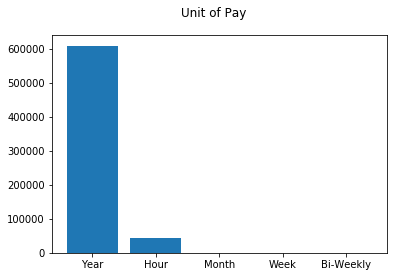

In [15]:
fig, ax = plt.subplots()
ax.bar(sal_f, sal_v)
fig.suptitle('Unit of Pay')

The histogram shows that the majority of salaries submitted during the application have "Year" as the unit of pay. 

In [16]:
sal_unit = salar_df[['WAGE_RATE_OF_PAY_FROM', 'WAGE_UNIT_OF_PAY']]
sal_unit.head()

,WAGE_RATE_OF_PAY_FROM,WAGE_UNIT_OF_PAY
0,143915.0,Year
1,100000.0,Year
2,78240.0,Year
3,84406.0,Year
4,95000.0,Year


In [17]:
sal_unit = sal_unit.fillna({"WAGE_UNIT_OF_PAY": "Year"})

In [18]:
sal_unit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654360 entries, 0 to 654359
Data columns (total 2 columns):
WAGE_RATE_OF_PAY_FROM    654360 non-null float64
WAGE_UNIT_OF_PAY         654360 non-null object
dtypes: float64(1), object(1)
memory usage: 10.0+ MB


In [19]:
sal_unit['WAGE_UNIT_OF_PAY'] = sal_unit['WAGE_UNIT_OF_PAY'].astype('category')
sal_unit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654360 entries, 0 to 654359
Data columns (total 2 columns):
WAGE_RATE_OF_PAY_FROM    654360 non-null float64
WAGE_UNIT_OF_PAY         654360 non-null category
dtypes: category(1), float64(1)
memory usage: 5.6 MB


In [20]:
sal_unit["UNIT_cat"] = sal_unit["WAGE_UNIT_OF_PAY"].cat.codes
sal_unit.head(100)

,WAGE_RATE_OF_PAY_FROM,WAGE_UNIT_OF_PAY,UNIT_cat
0,143915.0,Year,4
1,100000.0,Year,4
2,78240.0,Year,4
3,84406.0,Year,4
4,95000.0,Year,4
5,74000.0,Year,4
6,114000.0,Year,4
7,80579.0,Year,4
8,90000.0,Year,4
9,105000.0,Year,4


In [21]:
su = sal_unit.groupby(['UNIT_cat', 'WAGE_UNIT_OF_PAY'])['WAGE_RATE_OF_PAY_FROM'].sum()
print(su)

UNIT_cat  WAGE_UNIT_OF_PAY
0         Bi-Weekly           6.012245e+05
1         Hour                6.058661e+06
2         Month               4.651055e+06
3         Week                5.063442e+05
4         Year                5.966330e+10
Name: WAGE_RATE_OF_PAY_FROM, dtype: float64


Text(0.5, 1.0, 'Wages Per Category-0: Bi-weekly, 1:Hour, 2:Month, 3:Week, 4:Year')

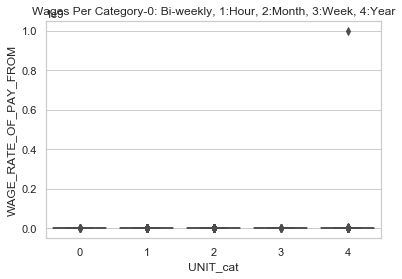

In [22]:
sns.set(style="whitegrid")
ax = sns.boxplot(x="UNIT_cat", y = "WAGE_RATE_OF_PAY_FROM", data=sal_unit)
plt.title('Wages Per Category-0: Bi-weekly, 1:Hour, 2:Month, 3:Week, 4:Year')

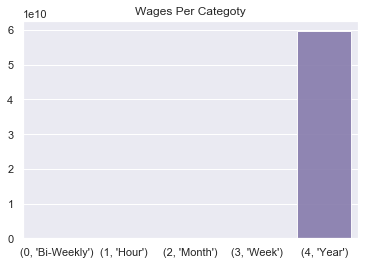

In [23]:
sns.set(style="darkgrid")
sns.barplot(su.index, su.values, alpha=0.9)
margins = 0.02
plt.title('Wages Per Categoty') 
plt.show()


In [24]:
sal_unit['Status'] = data_q4['CASE_STATUS']
sal_unit.head(100)

,WAGE_RATE_OF_PAY_FROM,WAGE_UNIT_OF_PAY,UNIT_cat,Status
0,143915.0,Year,4,CERTIFIED
1,100000.0,Year,4,CERTIFIED
2,78240.0,Year,4,CERTIFIED
3,84406.0,Year,4,CERTIFIED
4,95000.0,Year,4,CERTIFIED
5,74000.0,Year,4,CERTIFIED
6,114000.0,Year,4,CERTIFIED
7,80579.0,Year,4,CERTIFIED
8,90000.0,Year,4,CERTIFIED
9,105000.0,Year,4,CERTIFIED


In [27]:
sal_unit["Status"]= sal_unit['Status'].astype('category')
sal_unit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654360 entries, 0 to 654359
Data columns (total 5 columns):
WAGE_RATE_OF_PAY_FROM    654360 non-null float64
WAGE_UNIT_OF_PAY         654360 non-null category
UNIT_cat                 654360 non-null int8
Status                   654360 non-null category
Stat_cat                 654360 non-null category
dtypes: category(3), float64(1), int8(1)
memory usage: 7.5 MB


In [28]:
sal_unit["Stat_cat"] = sal_unit["Status"].cat.codes
sal_unit.head(10)

,WAGE_RATE_OF_PAY_FROM,WAGE_UNIT_OF_PAY,UNIT_cat,Status,Stat_cat
0,143915.0,Year,4,CERTIFIED,0
1,100000.0,Year,4,CERTIFIED,0
2,78240.0,Year,4,CERTIFIED,0
3,84406.0,Year,4,CERTIFIED,0
4,95000.0,Year,4,CERTIFIED,0
5,74000.0,Year,4,CERTIFIED,0
6,114000.0,Year,4,CERTIFIED,0
7,80579.0,Year,4,CERTIFIED,0
8,90000.0,Year,4,CERTIFIED,0
9,105000.0,Year,4,CERTIFIED,0


In [32]:
sal_unit.Stat_cat.value_counts()

0    579449
1     45004
3     21280
2      8627
Name: Stat_cat, dtype: int64

In [34]:
sh =sal_unit.groupby(['Stat_cat','Status','WAGE_UNIT_OF_PAY'])['WAGE_RATE_OF_PAY_FROM'].sum()
sh

Stat_cat  Status               WAGE_UNIT_OF_PAY
0         CERTIFIED            Bi-Weekly           2.413820e+05
                               Hour                2.091734e+06
                               Month               2.732544e+06
                               Week                3.361519e+05
                               Year                5.229644e+10
1         CERTIFIED-WITHDRAWN  Bi-Weekly           1.296996e+04
                               Hour                3.601978e+05
                               Month               1.220269e+05
                               Week                1.670000e+04
                               Year                3.838377e+09
2         DENIED               Bi-Weekly           2.753648e+05
                               Hour                8.599921e+05
                               Month               8.736156e+05
                               Week                3.298793e+04
                               Year                1.675

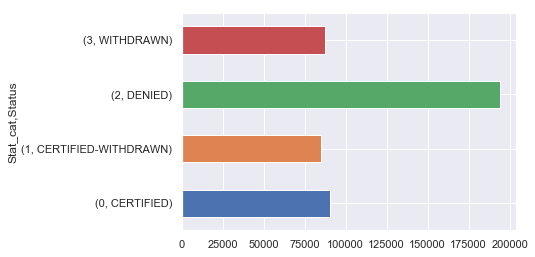

In [55]:
sal_unit.groupby(['Stat_cat','Status'])['WAGE_RATE_OF_PAY_FROM'].mean().plot(kind='barh')

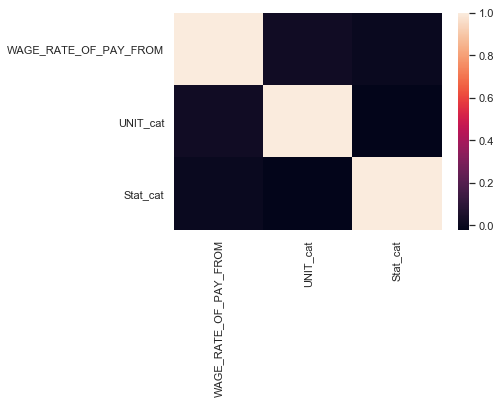

In [56]:
sns.heatmap(sal_unit.corr())